In [1]:
import pandas as pd

df_alerta = pd.read_csv('conjunto de datos/ALERTA.csv', sep=';')
df_alerta = df_alerta.select_dtypes(include='number')
df_alerta = df_alerta.drop('UDI',axis=1)
df_alerta

,Temperatura_Aire,Temperatura_Proceso,Velocidad_Rotacion,Torque,Desgaste_Herramientas,Objetivo
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0
9996,298.9,308.4,1632,31.8,17,0
9997,299.0,308.6,1645,33.4,22,0
9998,299.0,308.7,1408,48.5,25,0


In [37]:
x=df_alerta['Velocidad_Rotacion'].values.reshape(-1,1)
print('x: ', x)
y=df_alerta['Torque'].values
print('y: ', y)

x:  [[1551]
 [1408]
 [1498]
 ...
 [1645]
 [1408]
 [1500]]
y:  [42.8 46.3 49.4 ... 33.4 48.5 40.2]


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.3)

In [30]:
#definir el modelo de arbol de decision regresion
from sklearn.tree import DecisionTreeRegressor

adr= DecisionTreeRegressor(max_depth=5)

In [31]:
#Entrenar el modelo
modelo=adr.fit(X_train,y_train)
modelo

DecisionTreeRegressor(max_depth=5)

In [32]:
#prediccion
y_pred=adr.predict(X_test)
print("Prediccion ",y_pred)

Prediccion  [37.33231293 21.5515625  32.71626506 ... 25.34551724 44.40939086
 40.51583333]


C:\Users\leop4\AppData\Local\Temp\ipykernel_29296\2553384960.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_nuevo=np.arange(min(X_test),max(X_test),0.15)[:,np.newaxis]


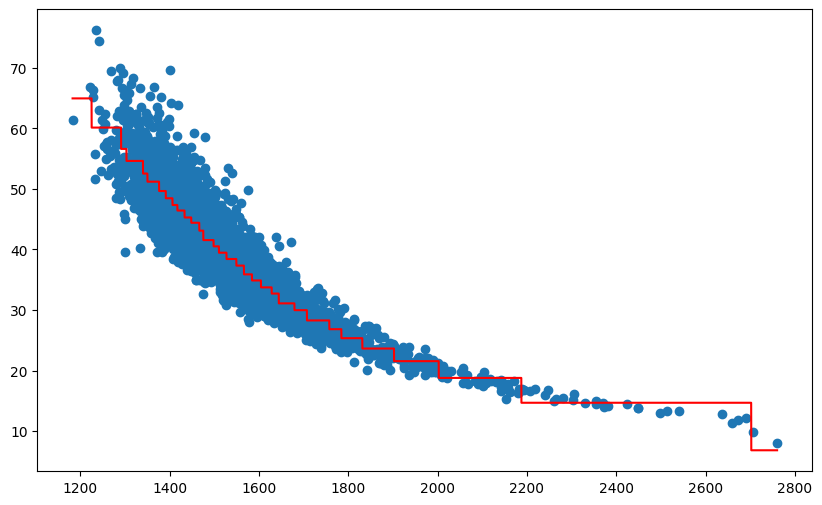

In [34]:
import matplotlib.pyplot as plt
import numpy as np

X_nuevo=np.arange(min(X_test),max(X_test),0.15)[:,np.newaxis]
#print(X_nuevo.size)
new_pred=adr.predict(X_nuevo)

plt.figure(figsize=(10,6))
plt.scatter(X_test,y_test)
plt.plot(X_nuevo,new_pred,color='r')
plt.show()

In [35]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(100,100))
tree.plot_tree(adr,feature_names=['RM'], filled=True)
plt.show()

In [36]:
precision = adr.score(X_test,y_test)
precision

0.8446914880013571